Name: Joseph Ridge Ogada
Adm.: 166895
task: Assignment 2

# Importing relevant *packages*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

# Business Understanding

- Dataset source:  dataset from the MIMIC-III database
- Contains information on in-hospital mortality from the monitoring of patients in the Intensive Care
Unit (ICU) for 48 hours

# Data Understanding

#### Feature Description

| Feature                         | Description                                                                 |
|-------------------------------------|-----------------------------------------------------------------------------|
| Capillary refill rate               | The time it takes for color to return to an external capillary bed (such as a fingertip) after pressure is applied. It is an indicator of peripheral perfusion. |
| Diastolic Blood Pressure            | The pressure in the arteries when the heart rests between beats. It's the lower of the two blood pressure measurements. |
| Fraction inspired oxygen            | The concentration of oxygen in the air mixture that is inhaled by the patient, often measured in ventilated patients. |
| Glascow coma scale eye opening      | A component of the Glasgow Coma Scale (GCS) that measures a patient's ability to open their eyes in response to stimuli. |
| Glascow coma scale motor response    | A component of the GCS that assesses a patient's motor response to stimuli, indicating brain function. |
| Glascow coma scale total            | The total score of the Glasgow Coma Scale, which assesses the level of consciousness in a person following a traumatic brain injury. |
| Glascow coma scale verbal response   | A component of the GCS that evaluates a patient’s verbal response, indicating their level of consciousness. |
| Glucose                             | The level of sugar (glucose) in the blood, an important indicator of metabolic status. |
| Heart Rate                          | The number of heartbeats per minute, indicating the functioning of the cardiovascular system. |
| Height                              | The measurement of a patient's stature, typically recorded in centimeters or meters. |
| Mean blood pressure                 | The average pressure in a patient's arteries during one cardiac cycle, indicating overall blood pressure. |
| Oxygen saturation                   | The percentage of hemoglobin binding sites in the bloodstream occupied by oxygen, indicating the oxygenation status of the patient. |
| Respiratory rate                    | The number of breaths taken per minute, indicating the patient’s respiratory status. |
| Systolic blood pressure             | The pressure in the arteries when the heart beats. It is the higher of the two blood pressure measurements. |
| Temperature                         | The body temperature of the patient, indicating metabolic and homeostatic status. |
| Weight                              | The body mass of the patient, typically recorded in kilograms. |
| pH                                  | The measure of acidity or alkalinity of the blood, indicating the balance of acids and bases in the body. |
| Patient_id                          | A unique identifier assigned to each patient for tracking and reference purposes. |
| target                              | The outcome or variable of interest (mortality), which the model is aiming to predict. |


####  Relevant Functions

In [ ]:
def  checkNullValues(df):
    print("Null Values Present in Data")
    print(df.isna().sum() * 100 / len(df))

####  Read Data:

In [ ]:
df  = pd.read_csv("https://raw.githubusercontent.com/JosephRidge/Applied-Machine-Learning-/main/Assignment%202/ihm_48_hours.csv")
df.head()

,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,Patient_id,target
0,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,-11.396037,-19.976803,NaN,76.0,94.000000,17.0,116.0,36.388889,83.5,NaN,30552,0
1,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,95.000000,18.0,116.0,36.388889,83.5,NaN,30552,0
2,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,-6.497052,18.0,116.0,36.388889,83.5,NaN,30552,0
3,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,95.000000,18.0,116.0,36.388889,83.5,NaN,30552,0
4,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,95.000000,18.0,116.0,36.388889,83.5,NaN,30552,0


In [ ]:
df.dtypes

,0
Capillary refill rate,float64
Diastolic blood pressure,float64
Fraction inspired oxygen,float64
Glascow coma scale eye opening,object
Glascow coma scale motor response,object
Glascow coma scale total,float64
Glascow coma scale verbal response,object
Glucose,float64
Heart Rate,float64
Height,float64


Insights:
- We have 14 fields of type float64
- 1 fields of type int64
- 4 fields of categorical data

In [ ]:
df_dimensions = df.shape
print(f"Dataset contains {df_dimensions[0]} rows and {df_dimensions[1]} columns." )

Dataset contains 300912 rows and 19 columns.


#### Descriptive statistics for Categorical data

In [ ]:
df.describe(include="object")

,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale verbal response,Patient_id
count,274190,296978,296884,300912
unique,7,12,12,6269
top,4 Spontaneously,6 Obeys Commands,1.0 ET/Trach,30552
freq,94516,115595,87646,48


##### Get Summary of categorical data feature classes

In [ ]:
def getColumnDetails(df):
    columns = df.select_dtypes(include=['object']).columns
    column_summaries = {}
    for column in columns:
        unique_values = df[column].dropna().unique()
        num_of_unique = len(unique_values)
        column_summary = f"Feature: {column}, has {num_of_unique} unique features: {unique_values}"
        column_summaries[column] = column_summary
    for column, summary in column_summaries.items():
        print(summary)

##### Columns Class Summary

In [ ]:
getColumnDetails(df)

Feature: Glascow coma scale eye opening, has 7 unique features: ['Spontaneously' '1 No Response' '4 Spontaneously' '2 To pain'
 '3 To speech' 'To Pain' 'To Speech']
Feature: Glascow coma scale motor response, has 12 unique features: ['Obeys Commands' '4 Flex-withdraws' '5 Localizes Pain' 'No response'
 '6 Obeys Commands' '1 No Response' 'Localizes Pain' 'Flex-withdraws'
 'Abnormal extension' '2 Abnorm extensn' 'Abnormal Flexion'
 '3 Abnorm flexion']
Feature: Glascow coma scale verbal response, has 12 unique features: ['Oriented' '1.0 ET/Trach' 'No Response-ETT' '5 Oriented' '4 Confused'
 'Incomprehensible sounds' '2 Incomp sounds' '3 Inapprop words' 'Confused'
 '1 No Response' 'No Response' 'Inappropriate Words']
Feature: Patient_id, has 6269 unique features: ['30552' '6893_' '63456' ... '66532' '29378' '11623']


Insights:

- **Glascow coma scale eye opening:**  
    - Has 274190 records
    - Nominal in nature
    - Composed of 7 unique classes
    - Most repeated frequency is '4 Spontaneously' with a frequency of 94516
    - Composed of 7 categories 'Spontaneously', '1 No Response', '4 Spontaneously', '2 To pain', '3 To speech', nan, 'To Pain', 'To Speech' since NaN is not a category but indicates missing values

- **Glascow coma scale motor response:**
    - Has 296978 records
    - Nominal in nature
    - Composed of 12 unique classes
    - Most repeated frequency is '6 Obeys Commands' with a frequency of 115595
    - Composed of 13 categories however NaN is not regarded as a category but indicates missing values

- **Glascow coma scale verbal response:**
    - Has 296884 records
    - Composed of 12 unique classes
    - Nominal in nature
    - Most repeated frequency is '1.0 ET/Trach' with a frequency of 87646
    - composed of  

- **Patient_id:**
    - Has 300912 records
    - Nominal in nature
    - Composed of 6269 unique classes/ patient_id's, implying that there existed 6269 patients in study
    - There might be a possibility of patients being assessed more than once
    - Most frequent patient has patiend_id of '11623' with a frequency of 48

Note: we do not have Binary categorical data

#### Descriptive statistics for Numerical data

In [ ]:
df.describe(include="object")

,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale verbal response,Patient_id
count,274190,296978,296884,300912
unique,7,12,12,6269
top,4 Spontaneously,6 Obeys Commands,1.0 ET/Trach,30552
freq,94516,115595,87646,48


Insights:

- **Capillary refill rate:**   
    - Has a 6336 data points
    - Most Data averages at around 0.219223
    - Lowest value is 0 and highest value is 1 indicating presence of binary values probably presenting normal/ abnormal states
    - Has as standard deviation of 0.4138
    - Most values are at 0, with some data points at 1, suggesting a skew towards normal states.

- **Diastolic blood pressure:**
    - Has 296944 data points recorded
    - Most levels fall around 62.54mmHg
    - Has a high standard deviation of 341.56, indicating high spread hence presence of outliers
    - the data will fall between 51 and 69 anything above or below is regarded as outliers
    - The max value is 100105 and min value is 0, indicating possible of error (possibly brought out during data collection phase)

- **Fraction inspired oxygen:**
    - Has 88464 data points recorded
    - Most levels fall around 0.599884
    - Has a standard deviation of 0.254, low spread hence little to no outliers present
    - the data will fall between 0.4 and 0.7 anything above or below is regarded as outliers
    - The max value is 7.1 and min value is 0, indicating possible presence of error or anomaly

- **Glascow coma scale total:**
    - Has 184416 records
    - Most levels fall around: 10.818123
    - Has a standard deviation of 4.334923
    - Lowest value is 3 and highest value is 15
    - Median at 11, indicating that most patients fall in the mid-range of this scale

- **Glucose:**
    - Has 300698 records
    - Most Data averages at around 130.63 mg/dL
    - Has a high Standard deviation of 84.17, implying high variation hence possiblity of outliers
    - Lowest value is -19.99 and highest value is 9999 this indicates severe errors in data
    - The values range between 101mg/dL to 158 mg/dL and anything outside and the range can be regarded as an outlier

- **Heart Rate:**
    - Has 300912 records
    - Most rates average at around a mean of 79 beats per minute
    - Has a standard deviation of of 32.15 (moderate variability)
    - The least value is -19.999623 and maximum value is 941
    - based on the quatiles, most values fall between 70 and 97 beats per minutes(bpm) with a median value of 84 bpm
    - Note that there might exist errors in the data collected especially during data entry

- **Height:**
    - Has 55824 records
    - Most heights average at around a mean of 168.54
    - Has a standard deviation of 15.14 which is not a very big deviation from the central points
    - Most of the heights fall between 160 to 178 with a median of 170
    - Tallest individual had a height of 203 and shortest individual had a height of 0 (probable error here)

- **Mean blood pressure:**
    - Has 296984 records
    - Most levels average at around a mean of 78.79 mg/dL.
    - Has a standard deviation of 29.529 which is exudes a deviation from the central points
    - Most of the levels fall between 68 and 88 with
    - Data set has a minimum value of -34 and max value of 9381, this is a possible data error

- **Oxygen saturation:**
    - Has 300912 records
    - Data averages with a mean of 95.343460
    - Has a standard deviation of 2529.203752, which is very high. This shows that there may exist outliers in the data
    - The Oxygen saturation levels fall between 95 and 100 with a central point of 98
    - The least saturation level recorded is -19.999687 and highest value of 981023(this is a possible error)

- **Respiratory rate:**
    - Has 300864 records
    - Data averages with a mean of 18.731265
    - Has as standard deviation of 6.884248(moderate variability), which is significantly ok hence data quality might be ok
    - The lowest value is 0 and largest being 1211(this may be erronoeus since the value is quite large)
    - The rates range between 15 and 22 with a median of 18

- **Systolic blood pressure:**
    - Has  300912 records
    - Data averages with a mean of  119.694213
    - Has as standard deviation of 23.396042(moderate variablity)
    - The lowest value is 0 and largest being 295
    - The rates range between 103 and 134 with a median of 117

- **Temperature:**
    - Has 298848 records
    - Data averages around 36.832834°C
    - Has as standard deviation of 1.000, which is small hence data quality might be ok
    - The lowest level is 0°C and largest being 73.76°C
    - The rates range between 36.277802°C and 37.388889°C with a median of 36.833333°C

- **Weight:**
    - Has 221040 records
    - Data averages with a mean of 82.969018
    - Has a standard deviation of 26.765857, which expresses that the data quality might not be ok
    - The lowest weight is at 0 and largest at 931.224376
    - The weights range between 66.600000 and 94.699997 with a median value of 79.099998

- **pH:**
    - Has 230614 records
    - Data averages with a mean of 5.573617
    - Has a standard deviation of 5.963634, which is not as high but expresses that the data quality might not be ok but at an insignificant level
    - The lowest weight is at -19.999706 and largest at 99
    - The weights range between 7.310000 and 7.420000 with a median value of 7.370000, the data seems to be compromised in term sof data quality because of the min and max values there exists outliers



*Generally:*
- *Based on the above the data quality is challenged, as some features contain outliers and other contain missing values.*
    

#### Explorative Data Analysis
Approches of Exploratory Data Analysis (EDA)
*  Univariate Analysis
*  Bivariate Analysis
*  Multivariate Analysis

#### Univariate Analysis

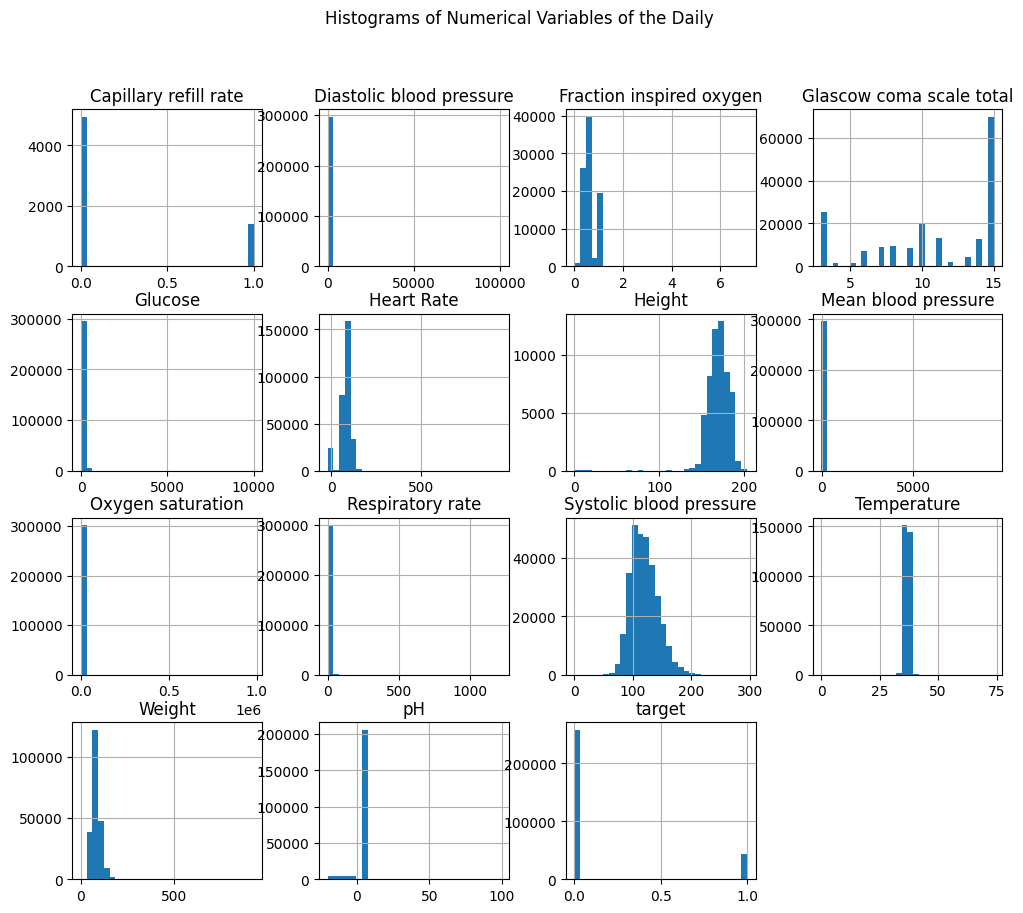

In [ ]:
df.select_dtypes(include=['float64', 'int64']).hist(bins=30, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Variables of the Daily ')
plt.show()

Insights:

- **Capillary refill rate:**
  - This histogram shows a heavily skewed distribution with most values clustered around 0.0 and a small number at 1.0. This suggests that the capillary refill rate is predominantly low for most observations.

- **Diastolic Blood Pressure:**
  - This variable also has a heavily skewed distribution. Most values are clustered at very low ranges, indicating potential issues with data quality or a population with abnormally low diastolic blood pressure readings.

- **Fraction Inspired Oxygen:**
  - The histogram indicates a right-skewed distribution, with most values between 0 and 1, but there are some values extending beyond 1, which might suggest outliers or potential measurement errors.

- **Glasgow Coma Scale Total:**
  - The histogram is relatively uniform with several peaks, indicating a wide range of values. This distribution could imply a diverse set of observations or a specific patient population with varying levels of consciousness.

- **Glucose:**
  - This histogram is extremely skewed, with most values concentrated at a lower range and a few extremely high values. This might indicate that most subjects have normal glucose levels, while a few have very high levels, which could be potential outliers or errors.

- **Heart Rate:**
  - There is a sharp peak at a lower range, and some high outliers. Most heart rate readings are clustered around a low range, which might indicate either a data quality issue or that the dataset predominantly contains individuals with low heart rates.

- **Height:**
  - The histogram for height shows a more normal distribution, with a peak around the 150-180 cm range. This suggests that height is more normally distributed across the dataset.

- **Mean Blood Pressure:**
  - The histogram is heavily skewed to the right with a few values stretching very high, which could indicate measurement errors or extreme cases.

- **Oxygen Saturation:**
  - The histogram is highly skewed, with most values close to the higher end, which is typical as oxygen saturation tends to be near 100% in healthy individuals.

- **Respiratory Rate:**
  - There is a cluster of values at a low range, which may suggest that most subjects have a low respiratory rate or there could be data quality issues.

- **Systolic Blood Pressure:**
  - This variable shows a normal-like distribution with a peak around 100-150 mmHg, suggesting that most subjects have systolic blood pressure within the normal range.

**Temperature:**
  - The histogram is skewed with most values clustered around a specific range (likely normal body temperature), with few outliers at very high values, suggesting data quality issues or specific cases with high temperatures.

**Weight:**
  - The histogram indicates a heavy skew towards lower weights, with a long tail extending to very high values. This might indicate a few subjects with very high weights, possibly outliers.

- **pH:**
  - The histogram shows a concentrated peak around normal physiological pH (around 7.4) with few deviations, suggesting that most readings are within the expected range.


- **General Observations:**
  - **Skewness:** Many histograms show skewed distributions, suggesting that some variables may have a high frequency of low or normal values with occasional outliers or extreme values.
  - **Outliers:** Several variables (like glucose, diastolic blood pressure, temperature, etc.) have long tails or isolated bars that suggest the presence of outliers or data entry errors.
  - **Data Quality:** There may be data quality issues given the extreme values observed in some histograms, suggesting a need for further cleaning or preprocessing (e.g., handling outliers, imputing missing values, etc.).
  - **Different Scales:** The histograms use different scales, making it crucial to standardize or normalize the data for certain analyses.

#### Bivariate Analysis

#### Multivariate Analysis

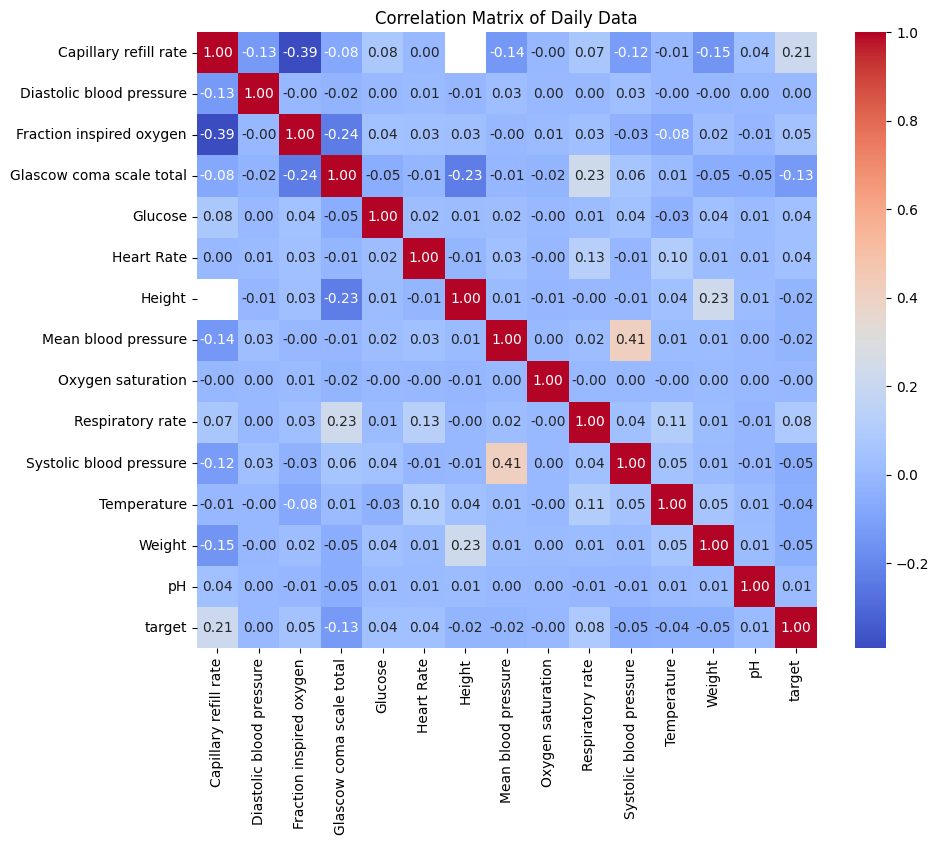

In [ ]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Daily Data')
plt.show()

### Relevant Functions

In [ ]:
def calculateIRQandPlot(df):
    Q1 = np.percentile(df, 25, method='midpoint')
    Q3 = np.percentile(df, 75, method='midpoint')
    IQR = Q3 - Q1
    print(f"Inter Quartile Range: {IQR}")
    lowerBound = Q1 - 1.5*IQR
    upperBound = Q3 + 1.5*IQR
    print(f"Lower Bound: {lowerBound}")
    print(f"Upper Bound: {upperBound}")
    df.plot(kind='box', subplots=True, layout=(2,2), figsize=(10, 8), title='Box Plots of Numerical Variables')
    plt.show()

def checkOutliersIQR(col, column_name):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = col[(col < lower_bound) | (col > upper_bound)]
    return f'Feature {column_name} contains {len(outliers)} outliers.'

def checkMissingValues(df):
    mn.matrix(df)
    print("Null Values Present in Data")
    print(df.isna().sum() * 100 / len(df))

def dropOutliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (lower_bound,upper_bound)#df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

def dropMissingValues(df):
    df_clean = df.dropna()
    num_of_rows_dropped = df_clean.shape[0] - df.shape[0]
    return df_clean

def imputeUsingMCTs(df,col, id):
    if id == 'mean':
        return df[col].fillna(df[col].mean())
    if id == 'mode':
        return df[col].fillna(df[col].mode()[0])
    if id == 'median':
        return df[col].fillna(df[col].median())
    else:
        return df[col].fillna(df[col].mean())


#### Checking outliers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300912 entries, 0 to 300911
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Capillary refill rate               6336 non-null    float64
 1   Diastolic blood pressure            296944 non-null  float64
 2   Fraction inspired oxygen            88464 non-null   float64
 3   Glascow coma scale eye opening      274190 non-null  object 
 4   Glascow coma scale motor response   296978 non-null  object 
 5   Glascow coma scale total            184416 non-null  float64
 6   Glascow coma scale verbal response  296884 non-null  object 
 7   Glucose                             300698 non-null  float64
 8   Heart Rate                          300912 non-null  float64
 9   Height                              55824 non-null   float64
 10  Mean blood pressure                 296984 non-null  float64
 11  Oxygen saturation         

Insights:
- Data is composed of 18 features excluding the target variable
- Some of the features contain missing values

In [ ]:
df.select_dtypes(include=['float64', 'int64']).columns

Index(['Capillary refill rate', 'Diastolic blood pressure',
       'Fraction inspired oxygen', 'Glascow coma scale total', 'Glucose',
       'Heart Rate', 'Height', 'Mean blood pressure', 'Oxygen saturation',
       'Respiratory rate', 'Systolic blood pressure', 'Temperature', 'Weight',
       'pH', 'target'],
      dtype='object')

Inter Quartile Range: nan
Lower Bound: nan
Upper Bound: nan


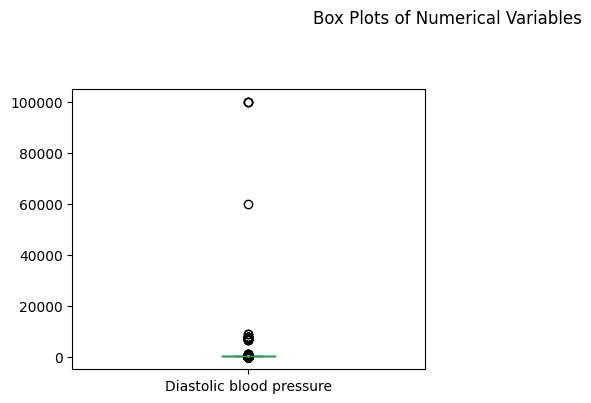

In [ ]:
calculateIRQandPlot(df['Diastolic blood pressure'])

Insights:

- Data contains outliers, indicated by the circles above the whiskers. These outliers suggest that there are a few diastolic blood pressure measurements that are significantly different from the majority of the data points.

- Approximateley 50% of the data points are clustered together

- The median value (the line within the box) appears to be close to zero, suggesting that the majority of diastolic blood pressure measurements are around zero.

- We are unable to calculate the quantiles due to the existence of missing values

Inter Quartile Range: nan
Lower Bound: nan
Upper Bound: nan


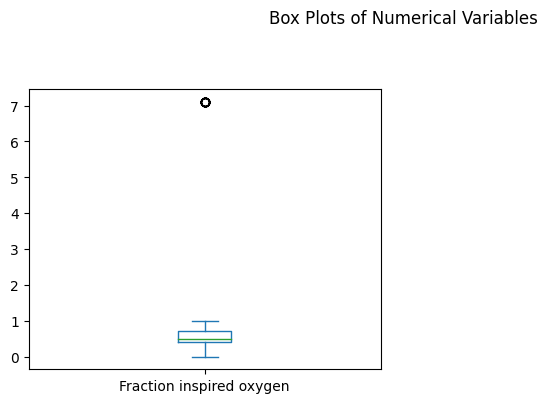

In [ ]:
calculateIRQandPlot(df['Fraction inspired oxygen'])

Insights:

- There is one outlier identified in the data, indicated by the circle above the upper whisker. This outlier suggests that there is one fraction inspired oxygen measurement that is significantly different from the majority of the data points.

- The lower whisker extends slightly below 1, while the upper whisker extends significantly above 1, indicating the range of the data excluding the outlier.

- The median value appears to be close to 1, suggesting that the majority of fraction inspired oxygen measurements are around 1.

- The box, representing the interquartile range, is relatively small, indicating that the middle 50% of the data points are clustered together.

- We are unable to calculate the quantiles due to the existence of missing values


Inter Quartile Range: nan
Lower Bound: nan
Upper Bound: nan


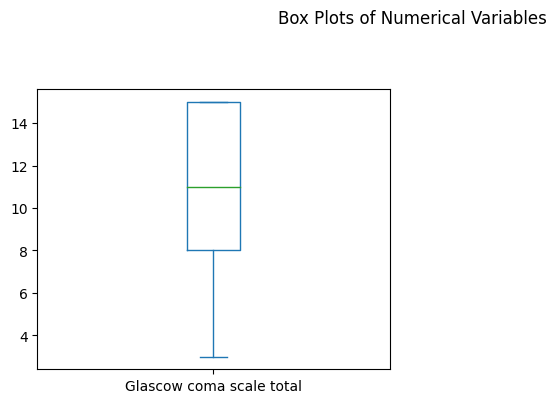

In [ ]:
calculateIRQandPlot(df['Glascow coma scale total'])

Insights:

- 50% of the Glascow coma scale total, are clustered together

- relatively small IQR and median score of 12 indicatin that most patienst have moderate to severe levels of consciousness

- The lower whisker tells that there are some patients with very low levels of consciousness

- The upper whisker extending to 15 suggests that there are some patients with relatively high levels of consciousness.

- We are unable to calculate the quantiles due to the existence of missing values

Inter Quartile Range: nan
Lower Bound: nan
Upper Bound: nan


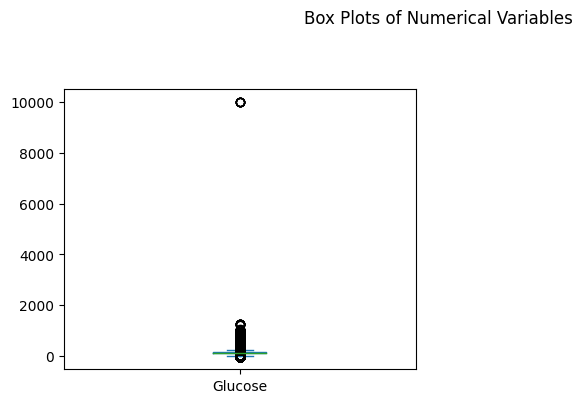

In [ ]:
calculateIRQandPlot(df['Glucose'])

Insights:

- We are unable to calculate the quantiles due to the existence of missing values

- There are presence of outliers as noticed by some points being outside the whiskers especially the level towards 10000

- The box, representing the interquartile range (IQR), is relatively small, indicating that the middle 50% of the glucose measurements are clustered together

- The median value (the line within the box) appears to be close to 0, suggesting that the majority of glucose measurements are around 0.


Inter Quartile Range: 27.0
Lower Bound: 29.5
Upper Bound: 137.5


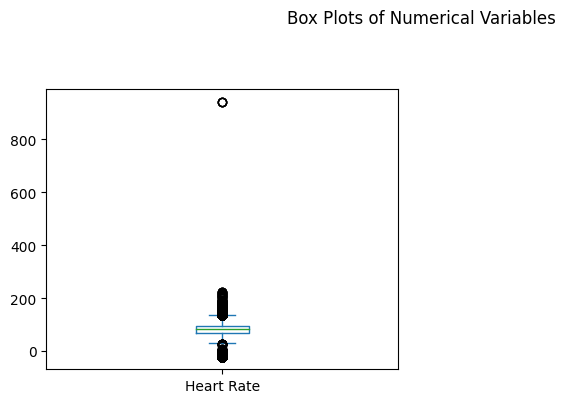

In [ ]:
calculateIRQandPlot(df['Heart Rate'])

Insights:

- The heart rate values fall between 137.5 and 29.5 hence anything above or below that range can be regarded as an outlier

- 50% of the measurements/ readings fall aroud 27.0

- The lower whisker extends down to around 50, while the upper whisker extends significantly above 100, indicating the range of the data excluding the outlier

- The box plot suggests a slight right-skewness in the data, meaning there might be a few higher heart rate measurements that are pulling the distribution to the right


Inter Quartile Range: nan
Lower Bound: nan
Upper Bound: nan


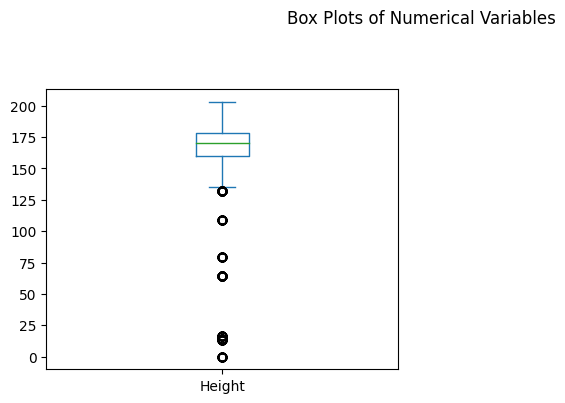

In [ ]:
calculateIRQandPlot(df['Height'])

Insights:

- We are unable to calculate the quantiles due to the existence of missing values

- There exist outliers that suggest that there are afew height measurements that are significantly different from the majority of the data points

- The box, representing the interquartile range (IQR), is relatively small, indicating that the middle 50% of the height measurements are clustered together

- The majority of height measurements are clustered around 175 units(typical range for human height)


Inter Quartile Range: nan
Lower Bound: nan
Upper Bound: nan


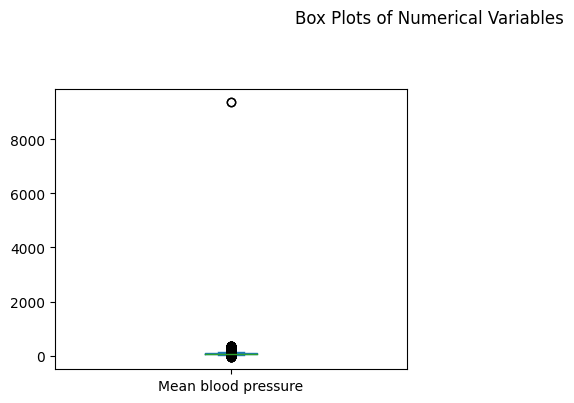

In [ ]:
calculateIRQandPlot(df['Mean blood pressure'])

Insights:

- We are unable to calculate the quantiles due to the existence of missing values

-  Presence of outlier as indicated by the circle above the upper whisker. This outlier suggests that there is one mean blood pressure measurement that is significantly different from the majority of the data points (which is a possible anomaly)

- The majority of mean blood pressure measurements are concentrated around 0, which might indicate a specific reference point or baseline value


Inter Quartile Range: 5.0
Lower Bound: 87.5
Upper Bound: 107.5


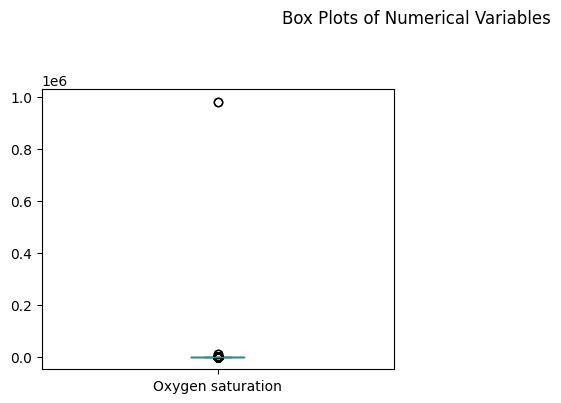

In [ ]:
calculateIRQandPlot(df['Oxygen saturation'])

Insights:

- 25% of the data falls below: 87.5

- 25% of the data falls above: 107.5

- 50% of the data points are spread out over a range of 5 units

- The box, representing the interquartile range (IQR), is very small, indicating that the middle 50% of the oxygen saturation measurements are clustered together

- The median value (the line within the box) appears to be close to 0, suggesting that the majority of oxygen saturation measurements are around 0


Inter Quartile Range: nan
Lower Bound: nan
Upper Bound: nan


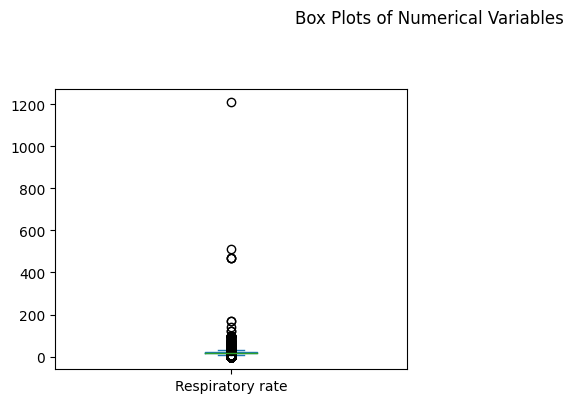

In [ ]:
calculateIRQandPlot(df['Respiratory rate'])

Insights:

- We are unable to calculate the quantiles due to the existence of missing values

- There exists outliers that suggest that there are two respiratory rate measurements that are significantly different from the majority of the data points

- The median value appears to be close to 0, suggesting that the majority of respiratory rate measurements are around 0

- The outliers suggest that there are two unusual measurements that might be worth investigating further

Inter Quartile Range: 31.0
Lower Bound: 56.5
Upper Bound: 180.5


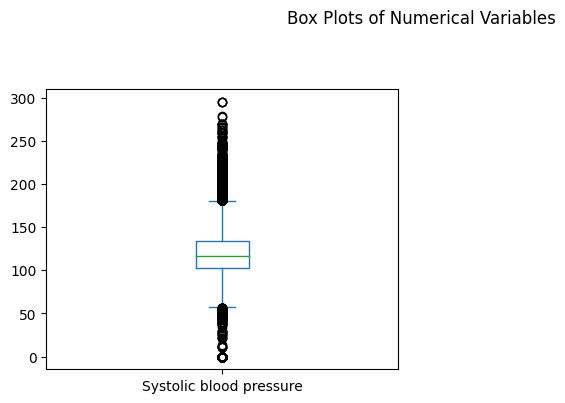

In [ ]:
calculateIRQandPlot(df['Systolic blood pressure'])

Insights:

- There are several outliers identified in the data, indicated by the circles above and below the whiskers

- The box, representing the interquartile range (IQR), is relatively small, indicating that the middle 50% of the systolic blood pressure measurements are clustered together

- This indicates that the spread between the 25th percentile and the 75th percentile is 31 units

- Any data point below 56.5 or above 180.5 is considered outside the typical range of values and could be potential outliers

Inter Quartile Range: nan
Lower Bound: nan
Upper Bound: nan


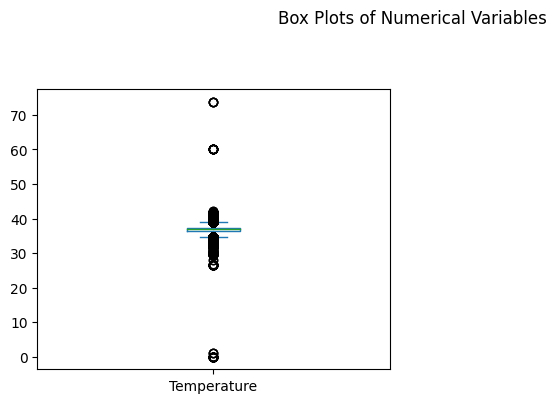

In [ ]:
calculateIRQandPlot(df['Temperature'])

Insights:

- We are unable to calculate the quantiles due to the existence of missing values

- Outliers are present, they suggest that there are two temperature measurements that are significantly different from the majority of the data points

- The majority of temperature measurements are clustered around 35 degrees, which suggests a moderate temperature range


Inter Quartile Range: nan
Lower Bound: nan
Upper Bound: nan


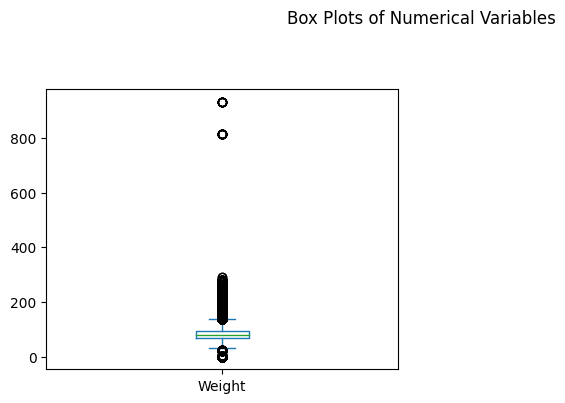

In [ ]:
calculateIRQandPlot(df['Weight'])

Insights:

- We are unable to calculate the quantiles due to the existence of missing values

- Outliers present, this suggests that there are two unusual measurements that might be worth investigating further

- The interquartile range (IQR), is relatively small, indicating that the middle 50% of the weight measurements are clustered together

- The median value (the line within the box) appears to be close to 0, suggesting that the majority of weight measurements are around 0

Inter Quartile Range: nan
Lower Bound: nan
Upper Bound: nan


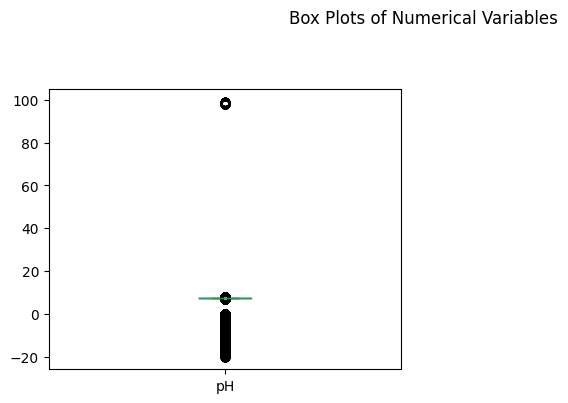

In [ ]:
calculateIRQandPlot(df['pH'])

Insights:

- We are unable to calculate the quantiles due to the existence of missing values

- Outliers present, this suggests that there are unusual measurements

- The median value appears to be close to 0, suggesting that the majority of pH measurements are around 0

---
General Insights from the Above Box plots and IQR calculations:

- There exist columns with missing values
- There exists outliers in the data

with the above we can tell there exists a breach in the data quality

---

#### Outliers in numerical variables

In [ ]:
numerical_variables = df.select_dtypes(include=['float64', 'int64'])
# numerical_variables = numerical_variables.drop('Capillary refill rate', axis=1)
categorical_variables = df.select_dtypes(include='object')
# categorical_variables['Capillary refill rate'] = df['Capillary refill rate']

In [ ]:
print('Insights:')
print('Summary of outliers present in numerical features of the data')
print(' ')
for col in numerical_variables.columns:
    print(checkOutliersIQR(numerical_variables[col], col))

Insights:
Summary of outliers present in numerical features of the data
 
Feature Capillary refill rate contains 1389 outliers.
Feature Diastolic blood pressure contains 6534 outliers.
Feature Fraction inspired oxygen contains 19 outliers.
Feature Glascow coma scale total contains 0 outliers.
Feature Glucose contains 38850 outliers.
Feature Heart Rate contains 26889 outliers.
Feature Height contains 480 outliers.
Feature Mean blood pressure contains 5814 outliers.
Feature Oxygen saturation contains 27454 outliers.
Feature Respiratory rate contains 11700 outliers.
Feature Systolic blood pressure contains 4113 outliers.
Feature Temperature contains 6050 outliers.
Feature Weight contains 6899 outliers.
Feature pH contains 26761 outliers.
Feature target contains 42768 outliers.


#### Missing Values in Categorical Variables

> Add blockquote



Null Values Present in Data
Glascow coma scale eye opening        8.880337
Glascow coma scale motor response     1.307359
Glascow coma scale verbal response    1.338597
Patient_id                            0.000000
dtype: float64


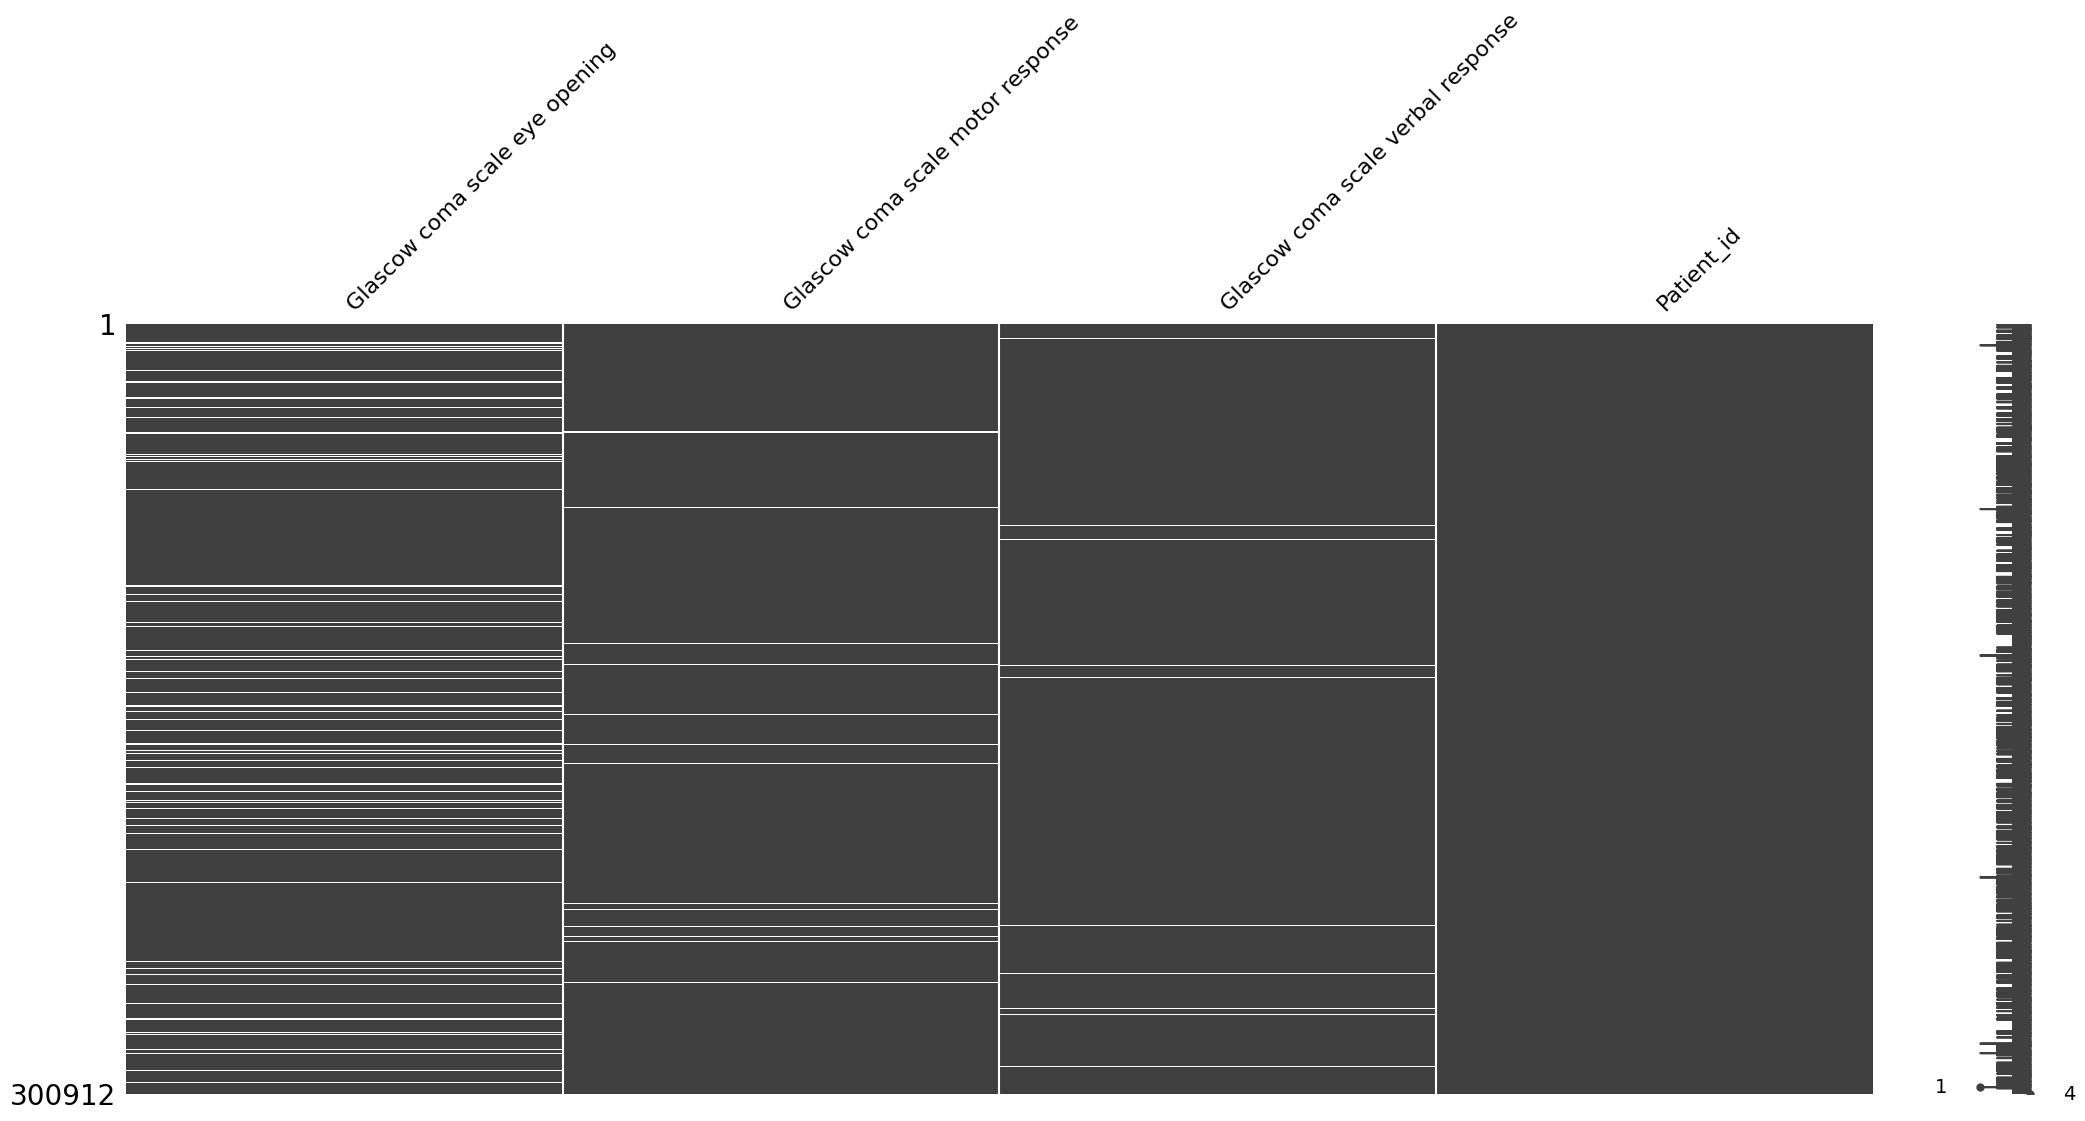

In [ ]:
checkMissingValues(categorical_variables)

Insights:
- **High Missingness:** The "Glascow coma scale eye opening" component has a relatively high percentage of missing values at 8.88%.

- **Low Missingness:** The "Glascow coma scale motor response," "Glascow coma scale verbal response," and "Patient_id" columns have very low or no missing values.

#### Missing Values in Numerical Variables


Null Values Present in Data
Capillary refill rate       97.894401
Diastolic blood pressure     1.318658
Fraction inspired oxygen    70.601372
Glascow coma scale total    38.714309
Glucose                      0.071117
Heart Rate                   0.000000
Height                      81.448397
Mean blood pressure          1.305365
Oxygen saturation            0.000000
Respiratory rate             0.015952
Systolic blood pressure      0.000000
Temperature                  0.685915
Weight                      26.543308
pH                          23.361647
target                       0.000000
dtype: float64


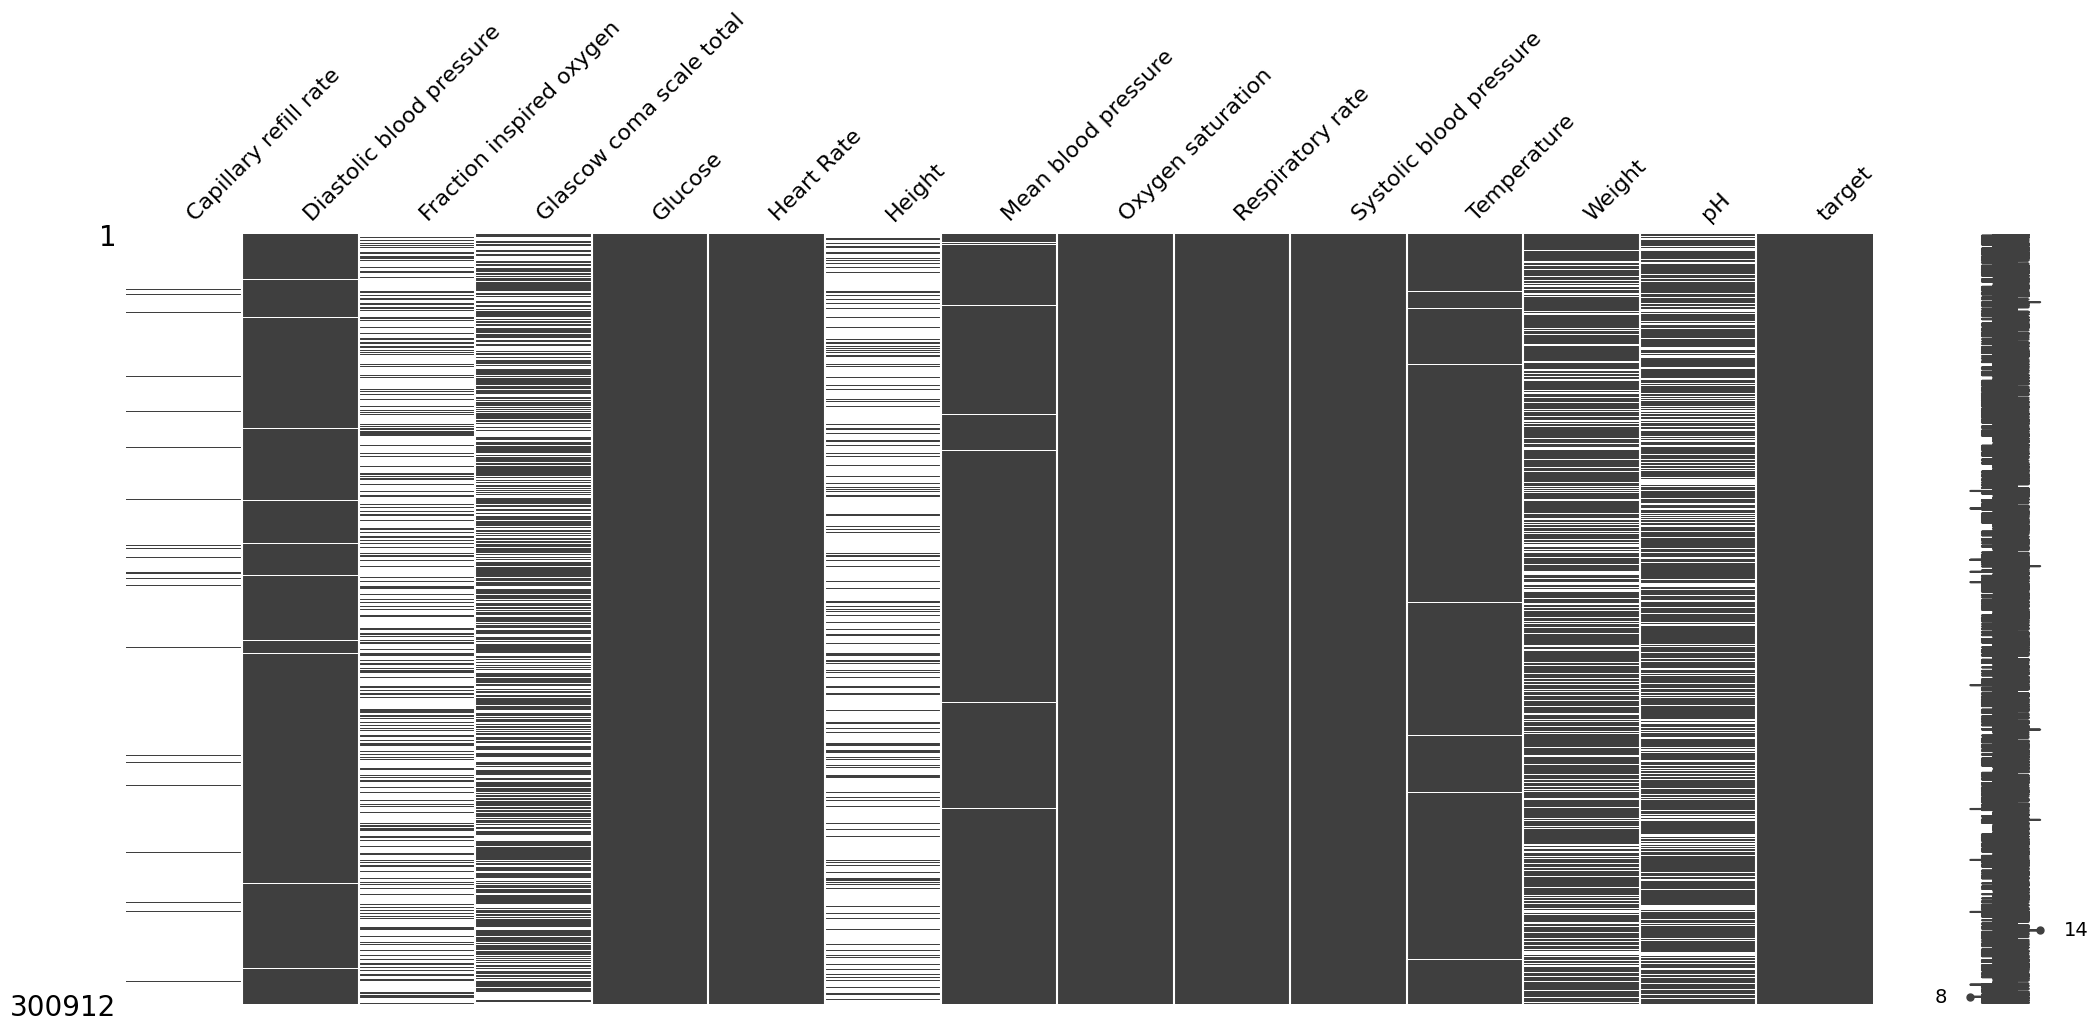

In [ ]:
checkMissingValues(numerical_variables)

Insights:

- **High Missingness:** Several variables have a high percentage of missing values, including "Capillary refill rate" (97.89%), "Fraction inspired oxygen" (70.60%), and "Height" (81.45%).

- **Low Missingness:** Other variables, such as "Heart Rate," "Oxygen saturation," "Systolic blood pressure," "Patient_id," and "target," have no missing values.

- **Moderate Missingness:** Some variables, like "Diastolic blood pressure," "Glascow coma scale" components, "Glucose," "Mean blood pressure," and "Respiratory rate," have moderate levels of missing data.

#### Handling Missing values in categorical data

In [ ]:
df_categorical_clean = dropMissingValues(categorical_variables) # drop missing values
print(f'Number of records before dropping: {categorical_variables.shape[0]}')
print(f'Number of rows dropped: {categorical_variables.shape[0] - df_categorical_clean.shape[0]}')


Number of records before dropping: 300912
Number of rows dropped: 33866


#### Handling Outliers in numerical data

##### Check outlisers in Numerical variable before dropping

In [ ]:
for cols in numerical_variables.columns:
    print(checkOutliersIQR(numerical_variables[cols], cols))

Feature Capillary refill rate contains 1389 outliers.
Feature Diastolic blood pressure contains 6534 outliers.
Feature Fraction inspired oxygen contains 19 outliers.
Feature Glascow coma scale total contains 0 outliers.
Feature Glucose contains 38850 outliers.
Feature Heart Rate contains 26889 outliers.
Feature Height contains 480 outliers.
Feature Mean blood pressure contains 5814 outliers.
Feature Oxygen saturation contains 27454 outliers.
Feature Respiratory rate contains 11700 outliers.
Feature Systolic blood pressure contains 4113 outliers.
Feature Temperature contains 6050 outliers.
Feature Weight contains 6899 outliers.
Feature pH contains 26761 outliers.
Feature target contains 42768 outliers.


In [ ]:
numerical_variables = pd.DataFrame(numerical_variables)
numerical_variables

,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale total,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,target
0,NaN,73.0,NaN,NaN,-11.396037,-19.976803,NaN,76.0,94.000000,17.0,116.0,36.388889,83.5,NaN,0
1,NaN,73.0,NaN,NaN,115.000000,96.000000,NaN,76.0,95.000000,18.0,116.0,36.388889,83.5,NaN,0
2,NaN,73.0,NaN,NaN,115.000000,96.000000,NaN,76.0,-6.497052,18.0,116.0,36.388889,83.5,NaN,0
3,NaN,73.0,NaN,NaN,115.000000,96.000000,NaN,76.0,95.000000,18.0,116.0,36.388889,83.5,NaN,0
4,NaN,73.0,NaN,NaN,115.000000,96.000000,NaN,76.0,95.000000,18.0,116.0,36.388889,83.5,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300907,NaN,59.0,NaN,15.0,105.000000,129.000000,NaN,89.0,98.000000,14.0,110.0,38.277802,NaN,7.36,0
300908,NaN,61.0,NaN,15.0,105.000000,108.000000,NaN,80.0,98.000000,15.0,116.0,37.444445,NaN,7.36,0
300909,NaN,61.0,NaN,15.0,100.000000,108.000000,NaN,80.0,98.000000,15.0,116.0,37.444445,NaN,7.36,0
300910,NaN,52.0,NaN,15.0,100.000000,108.000000,NaN,80.0,98.000000,16.0,101.0,37.444445,NaN,7.36,0


##### Drop outliers in numerical variable


In [ ]:
for col in numerical_variables.columns.str.strip():
    Q1 = numerical_variables[col].quantile(0.25)
    Q3 = numerical_variables[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    numerical_variables[col] = numerical_variables[col][(numerical_variables[col] >= lower_bound) & (numerical_variables[col] <= upper_bound)]


In [ ]:
numerical_variables.head()

,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale total,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,target
0,NaN,73.0,NaN,NaN,NaN,NaN,NaN,76.0,94.0,17.0,116.0,36.388889,83.5,NaN,0.0
1,NaN,73.0,NaN,NaN,115.0,96.0,NaN,76.0,95.0,18.0,116.0,36.388889,83.5,NaN,0.0
2,NaN,73.0,NaN,NaN,115.0,96.0,NaN,76.0,NaN,18.0,116.0,36.388889,83.5,NaN,0.0
3,NaN,73.0,NaN,NaN,115.0,96.0,NaN,76.0,95.0,18.0,116.0,36.388889,83.5,NaN,0.0
4,NaN,73.0,NaN,NaN,115.0,96.0,NaN,76.0,95.0,18.0,116.0,36.388889,83.5,NaN,0.0


##### Check outliers in Numerical data after dropping

In [ ]:
for cols in numerical_variables.columns:
    print(checkOutliersIQR(numerical_variables[cols], cols))

Feature Capillary refill rate contains 0 outliers.
Feature Diastolic blood pressure contains 0 outliers.
Feature Fraction inspired oxygen contains 0 outliers.
Feature Glascow coma scale total contains 0 outliers.
Feature Glucose contains 4502 outliers.
Feature Heart Rate contains 1283 outliers.
Feature Height contains 0 outliers.
Feature Mean blood pressure contains 1672 outliers.
Feature Oxygen saturation contains 2010 outliers.
Feature Respiratory rate contains 0 outliers.
Feature Systolic blood pressure contains 666 outliers.
Feature Temperature contains 1851 outliers.
Feature Weight contains 1017 outliers.
Feature pH contains 4331 outliers.
Feature target contains 0 outliers.


Insights:

- The data still contains some outliers thought afew have been dropped, the reason to this is because when computing the Quantiles we discover that due to the existence of missing values we tend not to successfully caclulate the quantiles hence the existence of outliers in some feeatures

##### Impute missing values with Measures of Central Tendency

In [ ]:
for col in numerical_variables.columns:
  numerical_variables[col] = imputeUsingMCTs(numerical_variables, col, 'mode') # handle missing values in numerical dat

##### Checking for the existence of missing values

Null Values Present in Data
Capillary refill rate       0.0
Diastolic blood pressure    0.0
Fraction inspired oxygen    0.0
Glascow coma scale total    0.0
Glucose                     0.0
Heart Rate                  0.0
Height                      0.0
Mean blood pressure         0.0
Oxygen saturation           0.0
Respiratory rate            0.0
Systolic blood pressure     0.0
Temperature                 0.0
Weight                      0.0
pH                          0.0
target                      0.0
dtype: float64


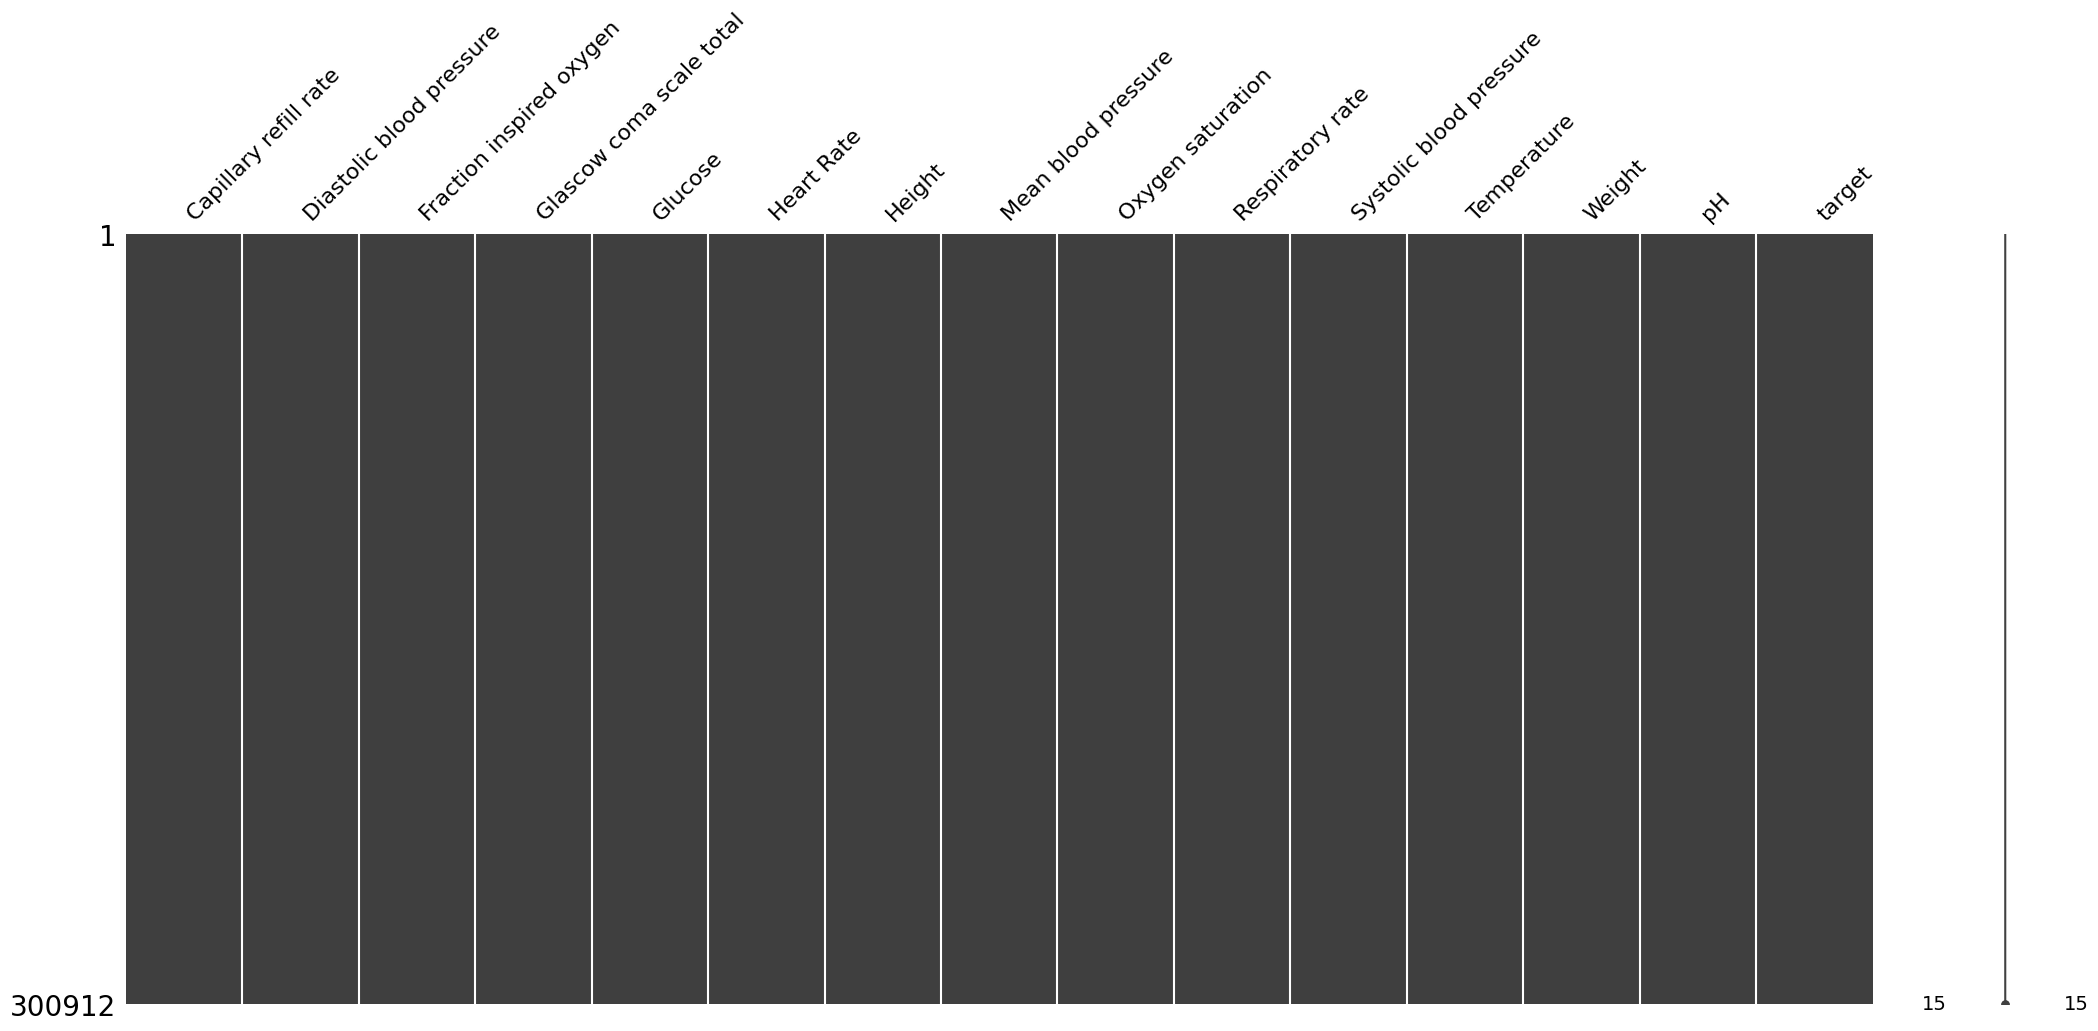

In [ ]:
checkMissingValues(numerical_variables)

Insights:

- Successful imputation of missing values using MCTs (mean)

Kindly note: The rational behind using mean is not defined at the moment.

#### Post-Processing

##### Statistical Description

In [ ]:
for col in numerical_variables.columns:
  print(checkOutliersIQR(numerical_variables, col))
  #calculateIRQandPlot(numerical_variables[col])

Feature Capillary refill rate contains 300912 outliers.
Feature Diastolic blood pressure contains 300912 outliers.
Feature Fraction inspired oxygen contains 300912 outliers.
Feature Glascow coma scale total contains 300912 outliers.
Feature Glucose contains 300912 outliers.
Feature Heart Rate contains 300912 outliers.
Feature Height contains 300912 outliers.
Feature Mean blood pressure contains 300912 outliers.
Feature Oxygen saturation contains 300912 outliers.
Feature Respiratory rate contains 300912 outliers.
Feature Systolic blood pressure contains 300912 outliers.
Feature Temperature contains 300912 outliers.
Feature Weight contains 300912 outliers.
Feature pH contains 300912 outliers.
Feature target contains 300912 outliers.


Feature Capillary refill rate contains 300912 outliers.
Inter Quartile Range: 0.0
Lower Bound: 0.0
Upper Bound: 0.0


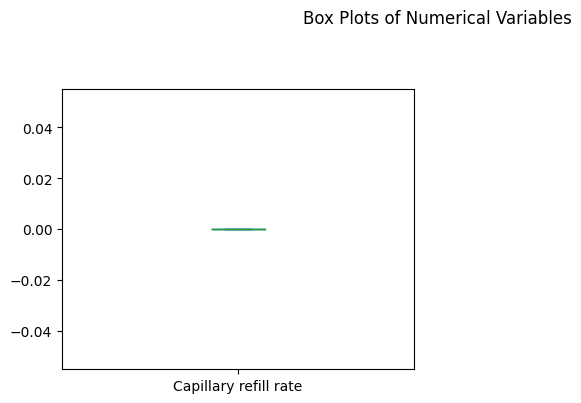

Feature Diastolic blood pressure contains 300912 outliers.
Inter Quartile Range: 17.0
Lower Bound: 25.5
Upper Bound: 93.5


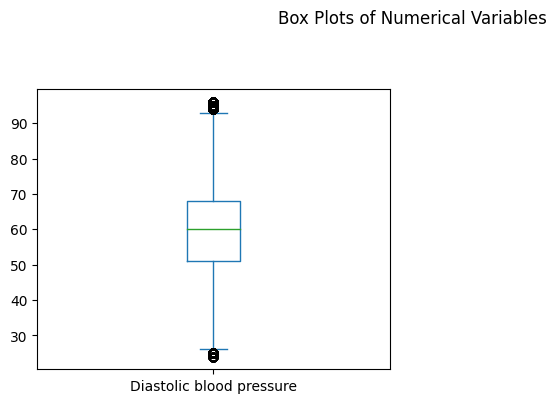

Feature Fraction inspired oxygen contains 300912 outliers.
Inter Quartile Range: 0.0
Lower Bound: 0.598487885500091
Upper Bound: 0.598487885500091


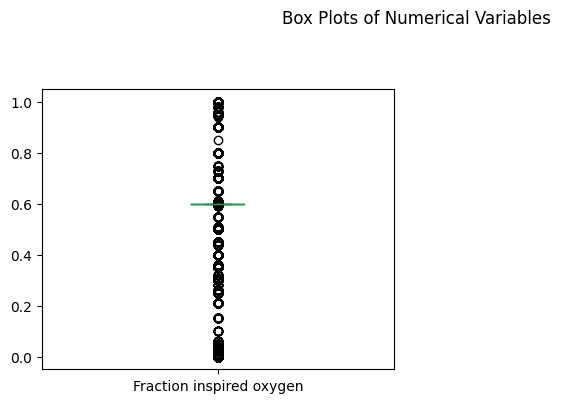

Feature Glascow coma scale total contains 300912 outliers.
Inter Quartile Range: 4.0
Lower Bound: 4.0
Upper Bound: 20.0


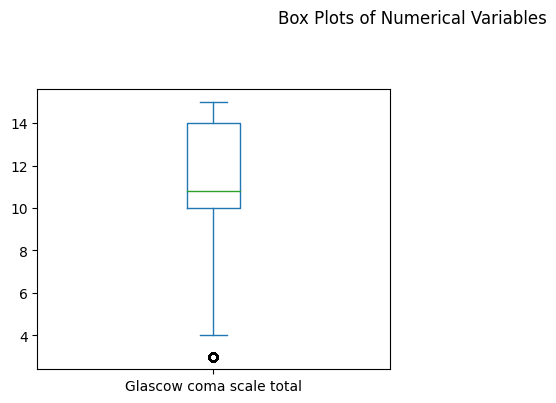

Feature Glucose contains 300912 outliers.
Inter Quartile Range: 41.0
Lower Bound: 47.5
Upper Bound: 211.5


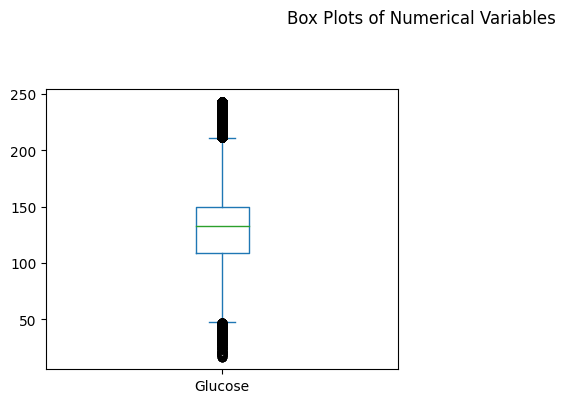

Feature Heart Rate contains 300912 outliers.
Inter Quartile Range: 22.0
Lower Bound: 42.0
Upper Bound: 130.0


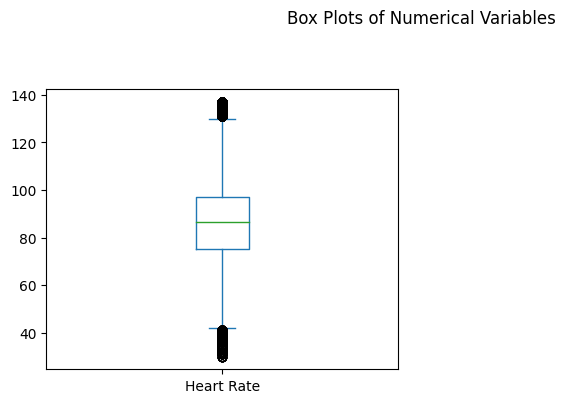

Feature Height contains 300912 outliers.
Inter Quartile Range: 0.0
Lower Bound: 169.46487424111015
Upper Bound: 169.46487424111015


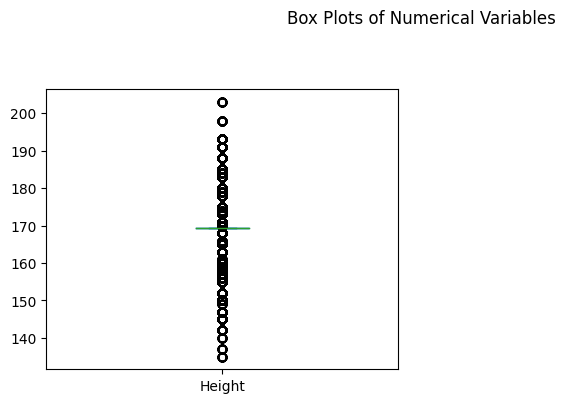

Feature Mean blood pressure contains 300912 outliers.
Inter Quartile Range: 19.0
Lower Bound: 39.5
Upper Bound: 115.5


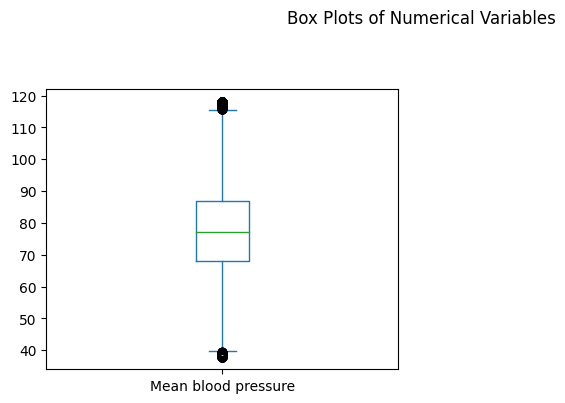

Feature Oxygen saturation contains 300912 outliers.
Inter Quartile Range: 4.0
Lower Bound: 90.0
Upper Bound: 106.0


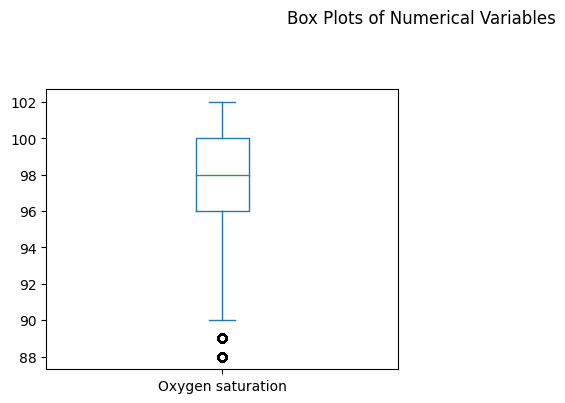

Feature Respiratory rate contains 300912 outliers.
Inter Quartile Range: 7.0
Lower Bound: 4.5
Upper Bound: 32.5


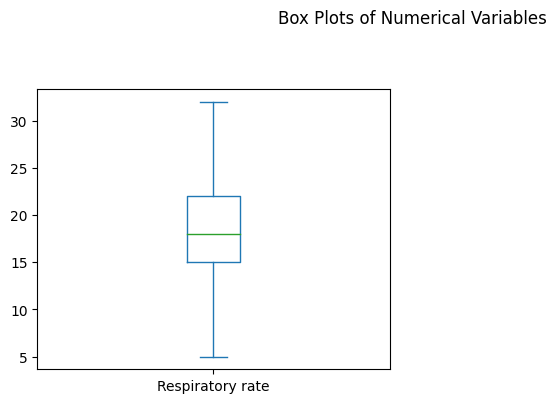

Feature Systolic blood pressure contains 300912 outliers.
Inter Quartile Range: 30.0
Lower Bound: 58.0
Upper Bound: 178.0


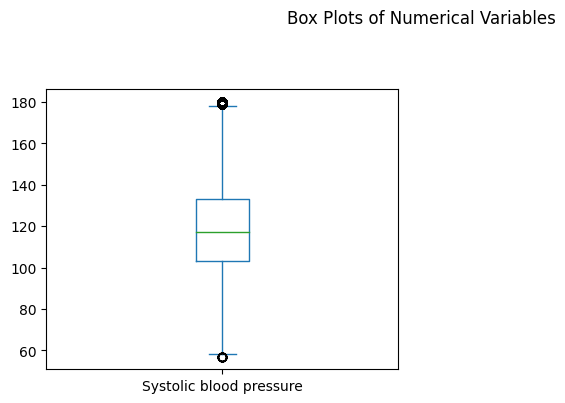

Feature Temperature contains 300912 outliers.
Inter Quartile Range: 0.9999983045789875
Lower Bound: 34.83333587646486
Upper Bound: 38.83332909478081


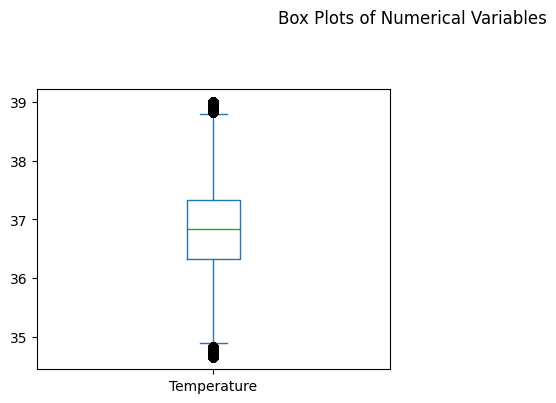

Feature Weight contains 300912 outliers.
Inter Quartile Range: 15.199996948242188
Lower Bound: 48.50000762939453
Upper Bound: 109.29999542236328


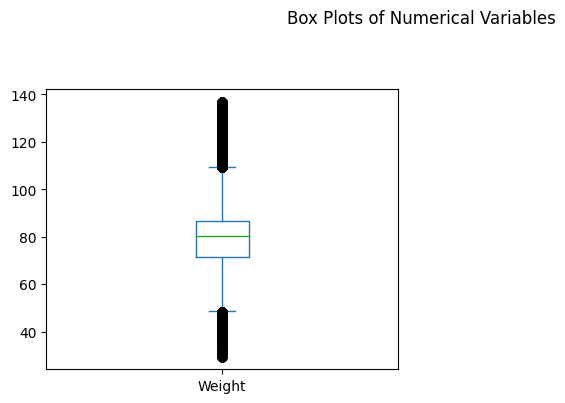

Feature pH contains 300912 outliers.
Inter Quartile Range: 0.04999999999999982
Lower Bound: 7.285
Upper Bound: 7.484999999999999


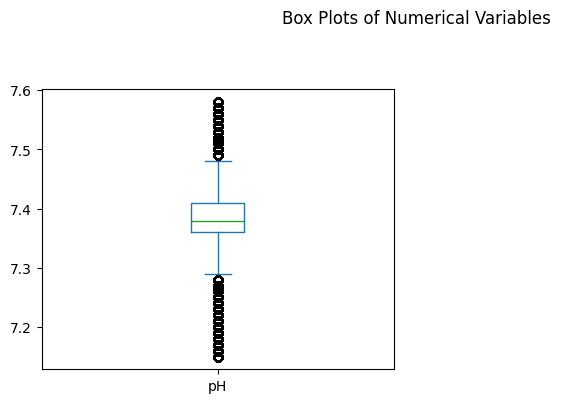

Feature target contains 300912 outliers.
Inter Quartile Range: 0.0
Lower Bound: 0.0
Upper Bound: 0.0


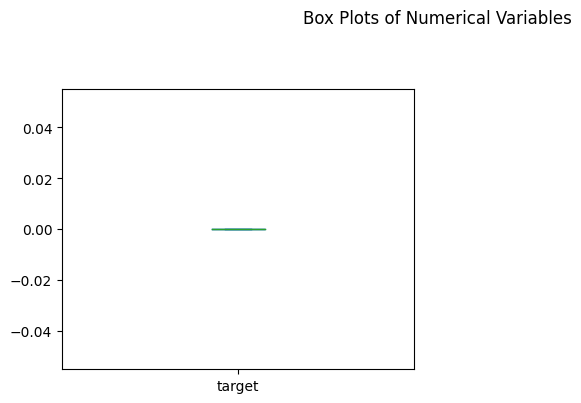

In [ ]:
# Output when imputation is done using Mean
for col in numerical_variables.columns:
  print(checkOutliersIQR(numerical_variables, col))
  calculateIRQandPlot(numerical_variables[col])

With Mean Imputation, we tend to attain more outliers hence it being the wrong choice of MCT, hence we try use median

##### Missing Value Check

In [ ]:
df_cleaned =  pd.merge(categorical_variables, numerical_variables , left_index=True, right_index=True)

Null Values Present in Data
Glascow coma scale eye opening        8.880337
Glascow coma scale motor response     1.307359
Glascow coma scale verbal response    1.338597
Patient_id                            0.000000
Capillary refill rate                 0.000000
Diastolic blood pressure              0.000000
Fraction inspired oxygen              0.000000
Glascow coma scale total              0.000000
Glucose                               0.000000
Heart Rate                            0.000000
Height                                0.000000
Mean blood pressure                   0.000000
Oxygen saturation                     0.000000
Respiratory rate                      0.000000
Systolic blood pressure               0.000000
Temperature                           0.000000
Weight                                0.000000
pH                                    0.000000
target                                0.000000
dtype: float64


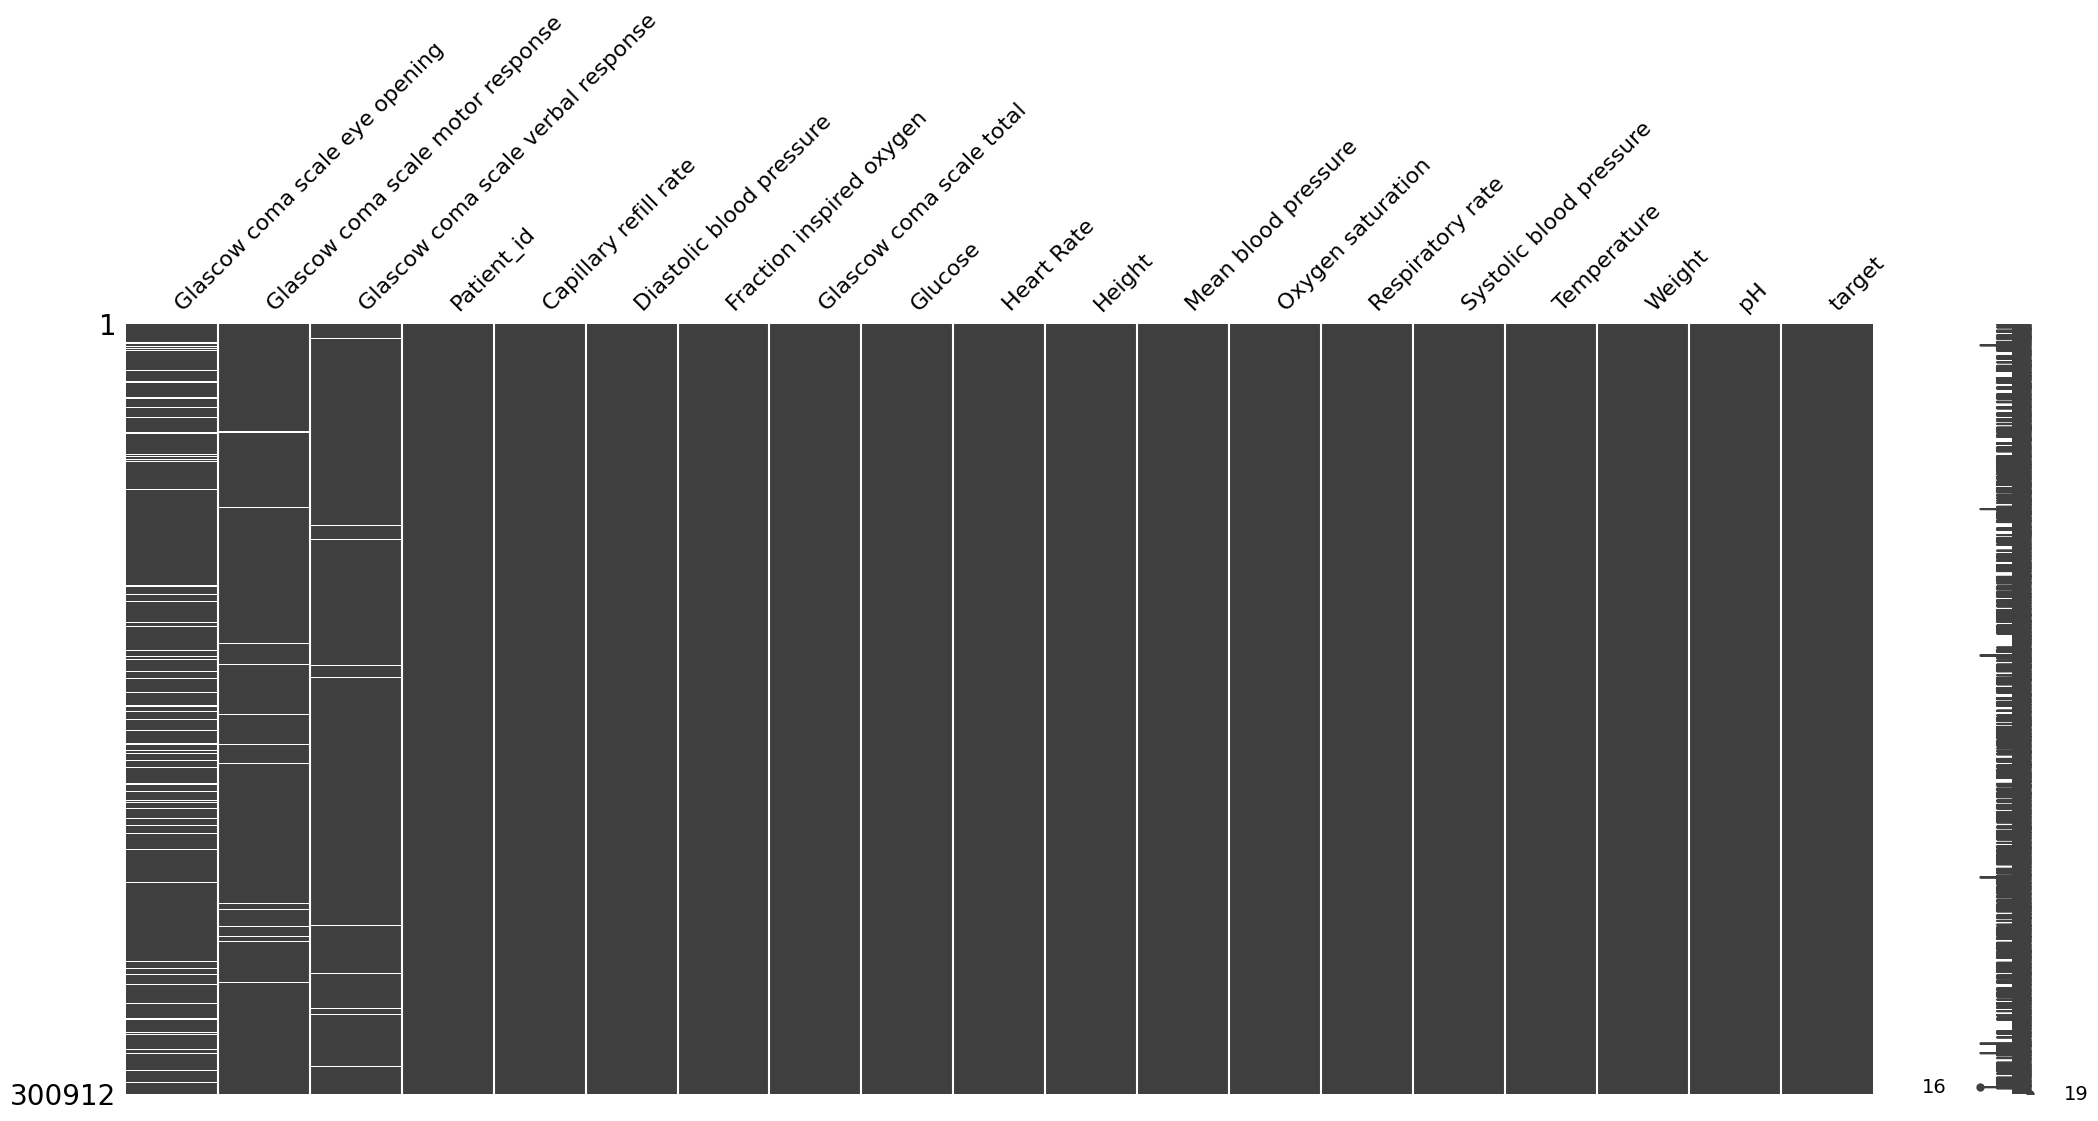

In [ ]:
checkMissingValues(df_cleaned)

In [ ]:
df_categorical_clean.head()

,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale verbal response,Patient_id
0,Spontaneously,Obeys Commands,Oriented,30552
1,Spontaneously,Obeys Commands,Oriented,30552
2,Spontaneously,Obeys Commands,Oriented,30552
3,Spontaneously,Obeys Commands,Oriented,30552
4,Spontaneously,Obeys Commands,Oriented,30552


In [ ]:
numerical_variables.head()

,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale total,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,target
0,0.0,73.0,0.5,15.0,115.0,80.0,178.0,76.0,94.0,17.0,116.0,36.388889,83.5,7.38,0.0
1,0.0,73.0,0.5,15.0,115.0,96.0,178.0,76.0,95.0,18.0,116.0,36.388889,83.5,7.38,0.0
2,0.0,73.0,0.5,15.0,115.0,96.0,178.0,76.0,100.0,18.0,116.0,36.388889,83.5,7.38,0.0
3,0.0,73.0,0.5,15.0,115.0,96.0,178.0,76.0,95.0,18.0,116.0,36.388889,83.5,7.38,0.0
4,0.0,73.0,0.5,15.0,115.0,96.0,178.0,76.0,95.0,18.0,116.0,36.388889,83.5,7.38,0.0


In [ ]:
df_cleaned = pd.merge(df_categorical_clean, numerical_variables, left_index=True, right_index=True)

Null Values Present in Data
Glascow coma scale eye opening        0.0
Glascow coma scale motor response     0.0
Glascow coma scale verbal response    0.0
Patient_id                            0.0
Capillary refill rate                 0.0
Diastolic blood pressure              0.0
Fraction inspired oxygen              0.0
Glascow coma scale total              0.0
Glucose                               0.0
Heart Rate                            0.0
Height                                0.0
Mean blood pressure                   0.0
Oxygen saturation                     0.0
Respiratory rate                      0.0
Systolic blood pressure               0.0
Temperature                           0.0
Weight                                0.0
pH                                    0.0
target                                0.0
dtype: float64


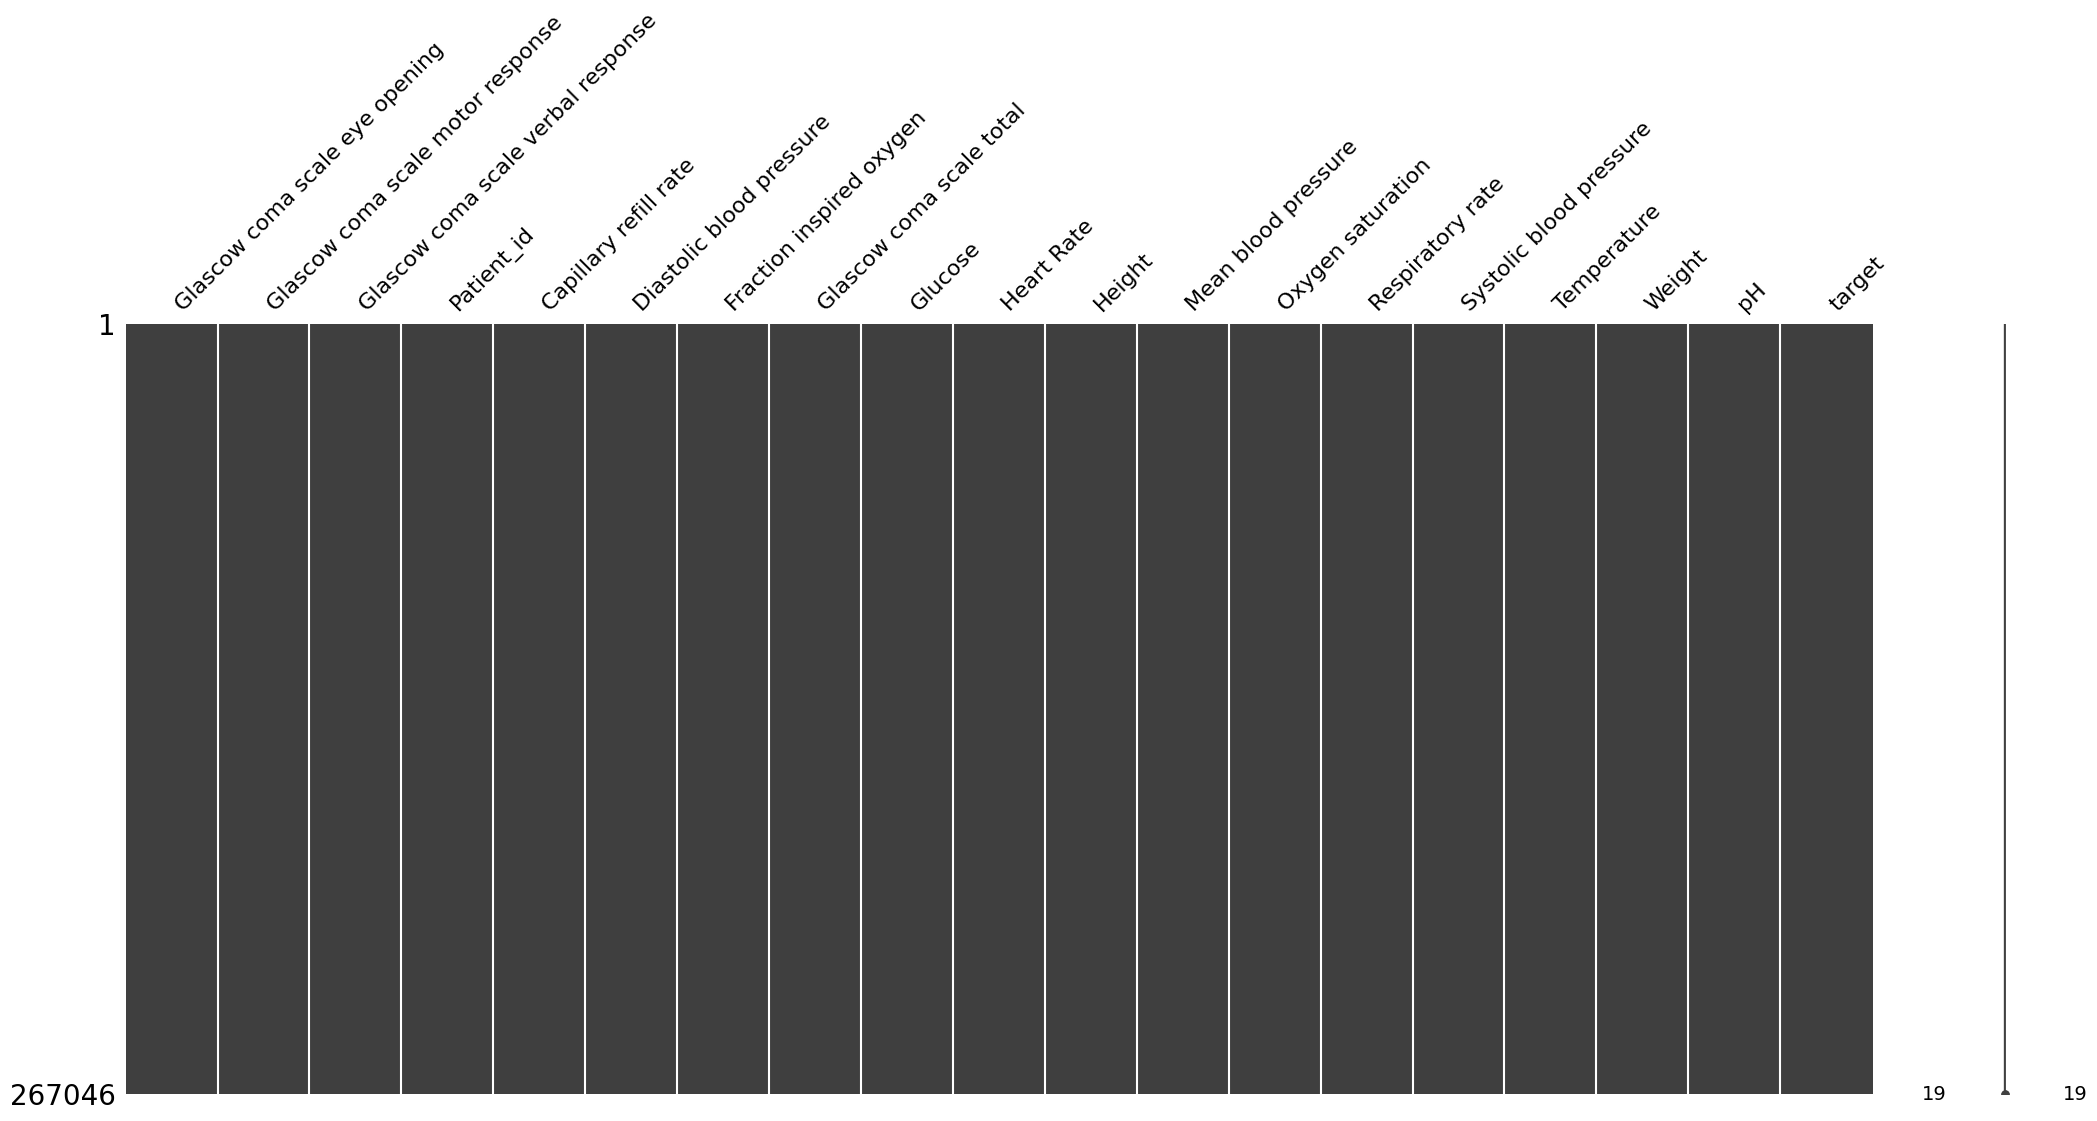

In [ ]:
checkMissingValues(df_cleaned)

Insights:

- No missing values present

In [ ]:
for col in df_cleaned.columns:
    print(checkOutliersIQR(numerical_variables, col))

Feature Glascow coma scale eye opening contains 300912 outliers.
Feature Glascow coma scale motor response contains 300912 outliers.
Feature Glascow coma scale verbal response contains 300912 outliers.
Feature Patient_id contains 300912 outliers.
Feature Capillary refill rate contains 300912 outliers.
Feature Diastolic blood pressure contains 300912 outliers.
Feature Fraction inspired oxygen contains 300912 outliers.
Feature Glascow coma scale total contains 300912 outliers.
Feature Glucose contains 300912 outliers.
Feature Heart Rate contains 300912 outliers.
Feature Height contains 300912 outliers.
Feature Mean blood pressure contains 300912 outliers.
Feature Oxygen saturation contains 300912 outliers.
Feature Respiratory rate contains 300912 outliers.
Feature Systolic blood pressure contains 300912 outliers.
Feature Temperature contains 300912 outliers.
Feature Weight contains 300912 outliers.
Feature pH contains 300912 outliers.
Feature target contains 300912 outliers.
